# This is a basic neural network built to classify the MNIST dataset based on the book how to build your own neural network by tariq rasheed

In [2]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

C:\Users\joiakim\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## we would use the MNIST dataset

In [4]:
data_file = open("mnist_train.csv", "r")
datalist = data_file.readlines()
data_file.close()

In [5]:
len(datalist)

60001

In [6]:
datalist[1]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### building our class for neural network 

In [8]:
class Neuralnetwork():
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lrate = learningrate
        # weights are represented in matrix forms, using a normal distribution for intial weights
        self.wi_h = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes)) # weights from input to hidden nodes
        self.wh_o = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)) # weights from hidden to output nodes
        # sigmoid function for activation
        self.activation_function = lambda x: sp.expit(x) 
        pass
    
    
    def train(self, input_list, target_list):
        inputs= np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T
        
        #calculate signals into nodes and apply sigmoid function
        hidden_inputs = np.dot(self.wi_h, inputs) # 100 * 1
        hidden_outputs = self.activation_function(hidden_inputs) #100 * 1
        
        #calculate signals into nodes and apply function
        current_output = np.dot(self.wh_o, hidden_outputs) # 10 * 1
        final_output = self.activation_function(current_output) #10 * 1
        #calculating error and tuning
        o_error = targets-final_output
        hidden_errors = np.dot(self.wh_o.T, o_error) # 100 * 1
        #updating weights
        self.wh_o += self.lrate * np.dot((o_error * final_output*(1.0 -final_output)), np.transpose(hidden_outputs)) #10 * 100
        self.wi_h += self.lrate * np.dot((hidden_errors * hidden_outputs*(1.0 -hidden_outputs)), np.transpose(inputs))
        pass
    
    def query(self, *args):
        # convert input list to 2d array
        t_inputs = np.array(*args, ndmin=2).T
        #calculate signals into nodes and apply sigmoid function
        t_hidden_inputs = np.dot(self.wi_h, t_inputs)
        t_hidden_outputs = self.activation_function(t_hidden_inputs)
        #calculate signals into nodes and apply function
        t_current_output = np.dot(self.wh_o, t_hidden_outputs)
        t_final_output = self.activation_function(t_current_output)
        
        return t_final_output
    

### passing the hyperparameters and training our neural network

In [10]:
inputnodes = 784
hiddennodes = 100
outputnodes = 10
learningrate = 0.3

n = Neuralnetwork(inputnodes, hiddennodes, outputnodes, learningrate)

epochs=5

for e in range(epochs):
    for record in datalist[1:]:
        all_values = record.split(",")
        scaled_input = ((np.asfarray(all_values[1:])/255.0)* 0.99) + 0.01
        targets = np.zeros(outputnodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(scaled_input, targets)
        pass
    pass    

### scoring our accuracy on the test data set.

In [12]:
test_data_file = open("mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [13]:
val_t = test_data_list[1].split(",")
print(val_t[0])

7


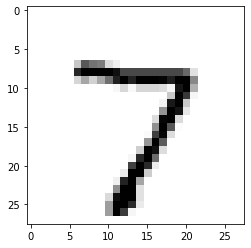

In [14]:
image_array = np.asfarray(val_t[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation="None")

In [15]:
n.query((np.asfarray(val_t[1:])/255 * 0.99) + 0.01)

array([[0.0033755 ],
       [0.00674218],
       [0.05881563],
       [0.00249201],
       [0.01348394],
       [0.00134506],
       [0.01024328],
       [0.98888294],
       [0.00257876],
       [0.00957366]])

### scoring neural network

In [16]:
scorecard = []

for record in test_data_list[1:]:
    xval = record.split(",")
    correct_label = int(xval[0])
    
    test_input = ((np.asfarray(xval[1:])/255.0) * 0.99) + 0.01
    test_output = n.query(test_input)
    test_label =  np.argmax(test_output)
    
    if test_label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass


In [17]:
scorecard_array = np.asarray(scorecard)
print("network performace = ",  scorecard_array.sum()/scorecard_array.size)

network performace =  0.9496
